In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
tcga_main_df = pd.read_csv('../data/TCGA-CDR-SupplementalTableS1.csv')
tcga_main_df = tcga_main_df[tcga_main_df['type']=='OV']
tcga_aux_df = pd.read_csv('../data/TCGA_clinical_PANCAN_patient_with_followup.csv',low_memory=False)
with open("../data/TCGA_platin_receivers.txt", "r") as file:
    tcga_platin_receivers = set(line.strip() for line in file)
with open("../data/TCGA_tp53mut.txt", "r") as file:
    tcga_tp53_mut = set(line.strip() for line in file)
tcga_main_df["platin_receivers"] = tcga_main_df["bcr_patient_barcode"].apply(lambda x: x in tcga_platin_receivers)
tcga_main_df["tp53mut"] = tcga_main_df["bcr_patient_barcode"].apply(lambda x: x in tcga_tp53_mut)
tcga_main_df = tcga_main_df[(tcga_main_df['platin_receivers']==True)&(tcga_main_df['tp53mut']==True)]
tcga_main_df = tcga_main_df[tcga_main_df['clinical_stage'].isin(['Stage IIIC', 'Stage IIIB', 'Stage IV','Stage IIIA'])]
tcga_aux_df = tcga_aux_df[tcga_aux_df['bcr_patient_barcode'].isin(tcga_main_df["bcr_patient_barcode"])]

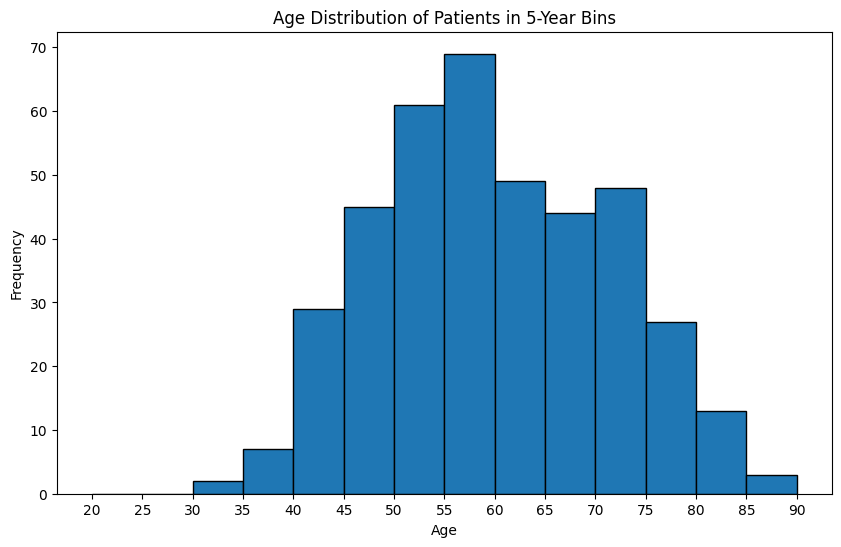

In [14]:
bins = range(20, 95, 5)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tcga_main_df["age_at_initial_pathologic_diagnosis"], bins=bins, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients in 5-Year Bins")
plt.xticks(bins)  # Optional: to show all bins on x-axis
plt.show()

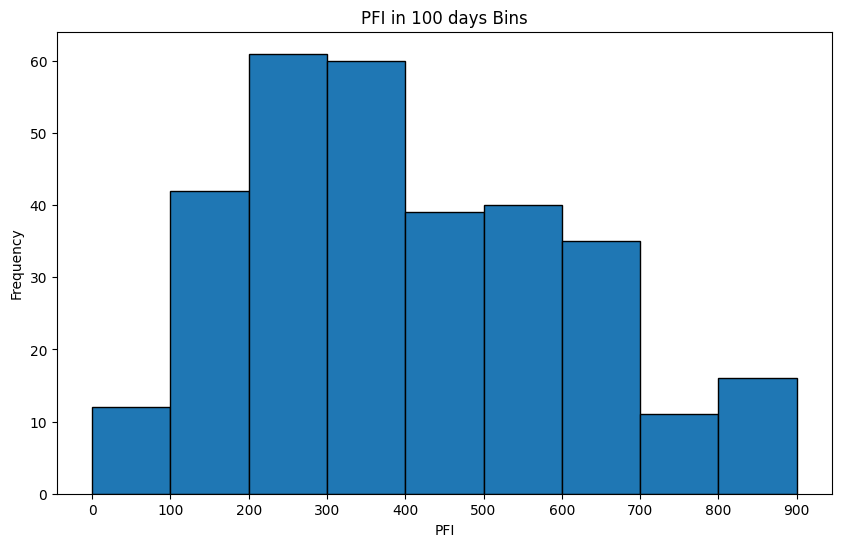

In [15]:
# Plot the histogram
bins = range(0, 1000, 100)

plt.figure(figsize=(10, 6))
plt.hist(tcga_main_df["PFI.time"], bins=bins,  edgecolor="black")
plt.xlabel("PFI")
plt.ylabel("Frequency")
plt.title("PFI in 100 days Bins")
plt.xticks(bins)  
plt.show()

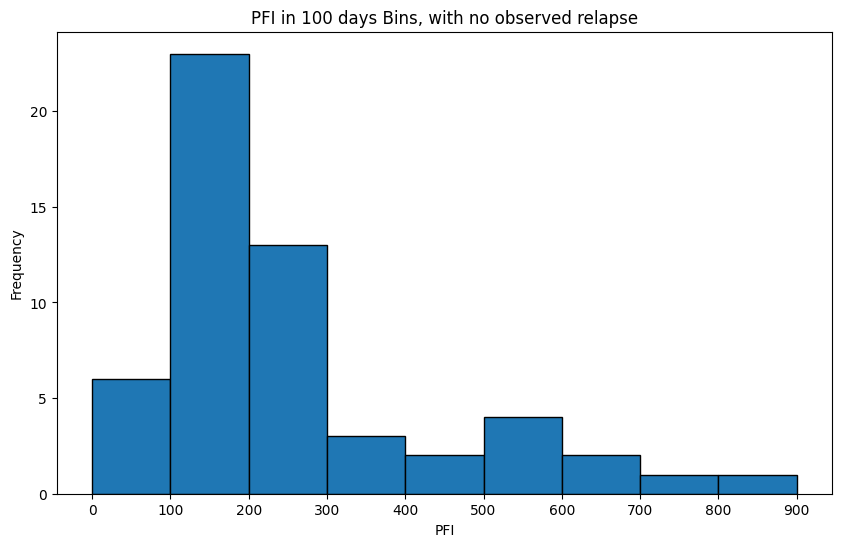

In [16]:
bins = range(0, 1000, 100)

plt.figure(figsize=(10, 6))
plt.hist(tcga_main_df[tcga_main_df["PFI"]==0]["PFI.time"], bins=bins,  edgecolor="black")
plt.xlabel("PFI")
plt.ylabel("Frequency")
plt.title("PFI in 100 days Bins, with no observed relapse")
plt.xticks(bins)  
plt.show()

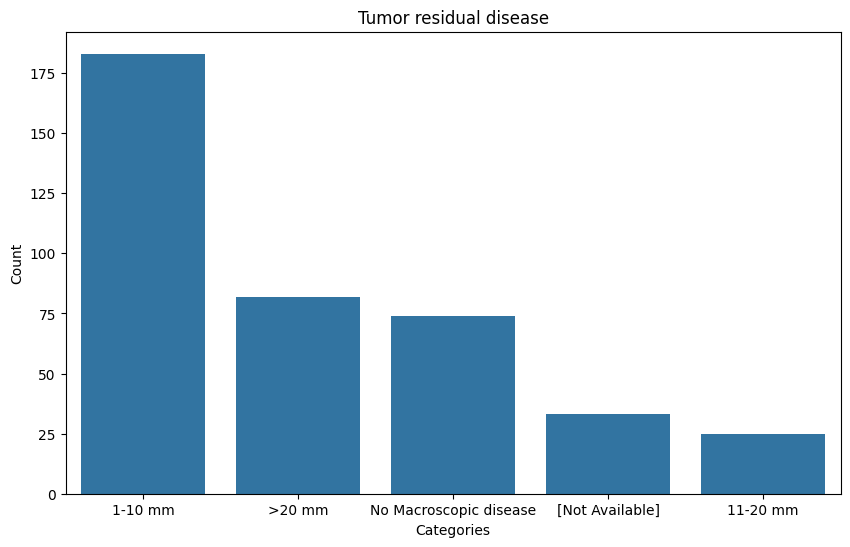

In [17]:
value_counts = tcga_aux_df['tumor_residual_disease'].value_counts()
plt.figure(figsize=(10, 6))

sns.barplot(x=value_counts.index, y=value_counts.values)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Tumor residual disease')
plt.show()